<a href="https://colab.research.google.com/github/jeshmin-shrestha/Mental-Health-Classification/blob/main/Mental_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
nltk.download(['punkt', 'stopwords', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df=pd.read_csv('/content/sentiment-analysis-for-mental-health-Combined%20Data (1).csv')
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [ ]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df.columns


Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [ ]:
# Drop redundant column
df = df[['statement', 'status']]  # Remove Unnamed: 0

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
statement,0
status,0


In [ ]:
print(df.shape)

(52681, 2)


In [ ]:
print(df['status'].value_counts())

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


/tmp/ipython-input-4288116306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='viridis')


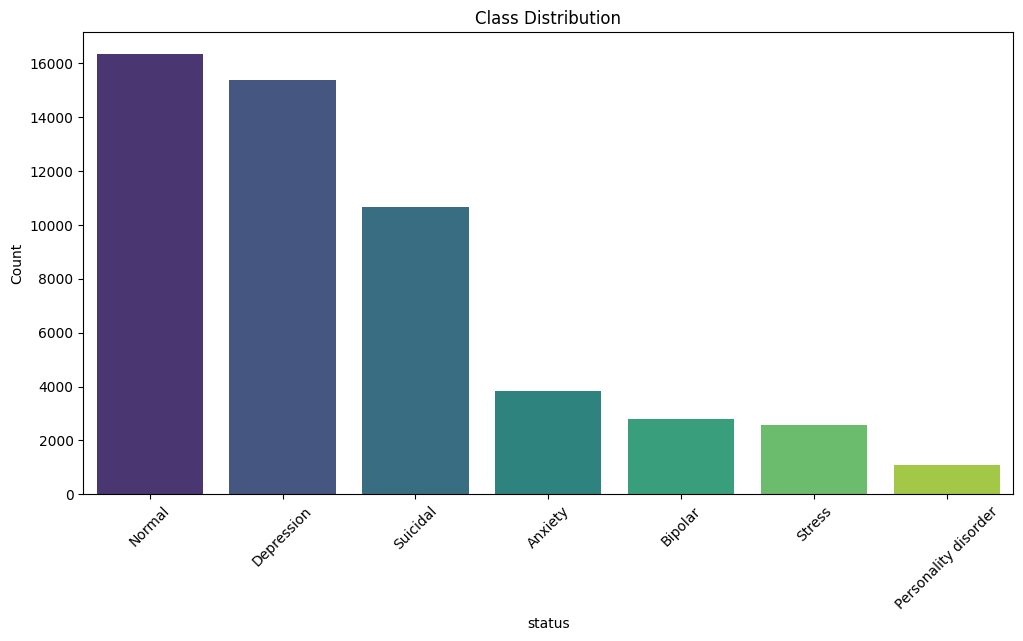

In [ ]:
# Class distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='viridis')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

/tmp/ipython-input-1217346969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='viridis')


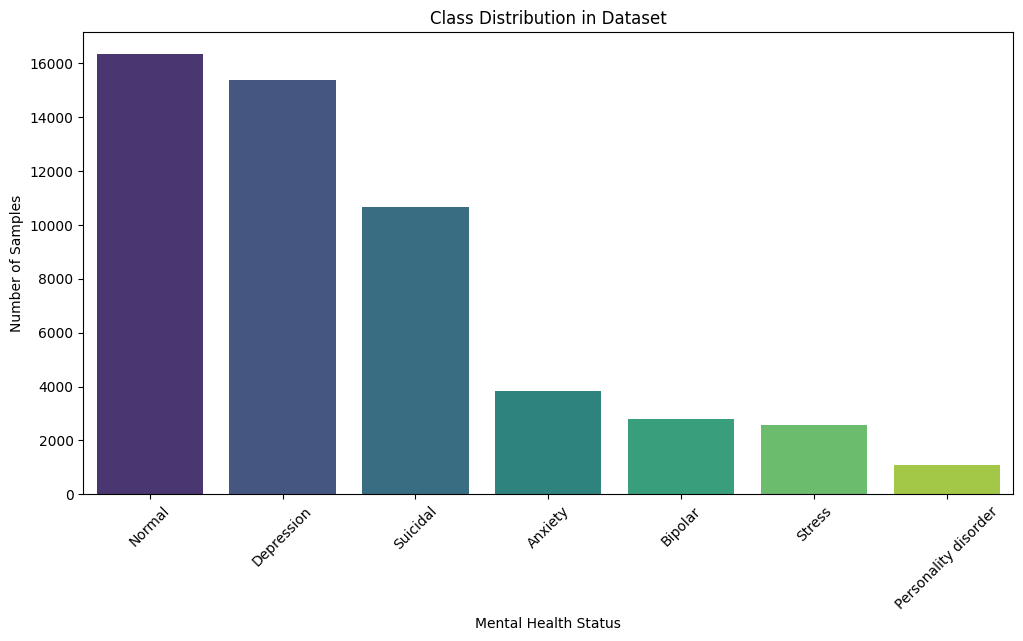

status
Normal                  31.022570
Depression              29.240144
Suicidal                20.219814
Anxiety                  7.291054
Bipolar                  5.271350
Stress                   4.910689
Personality disorder     2.044380
Name: proportion, dtype: float64


In [ ]:
# Class distribution plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='viridis')
plt.title('Class Distribution in Dataset')
plt.xlabel('Mental Health Status')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

# Print percentages for report
print(df['status'].value_counts(normalize=True) * 100)

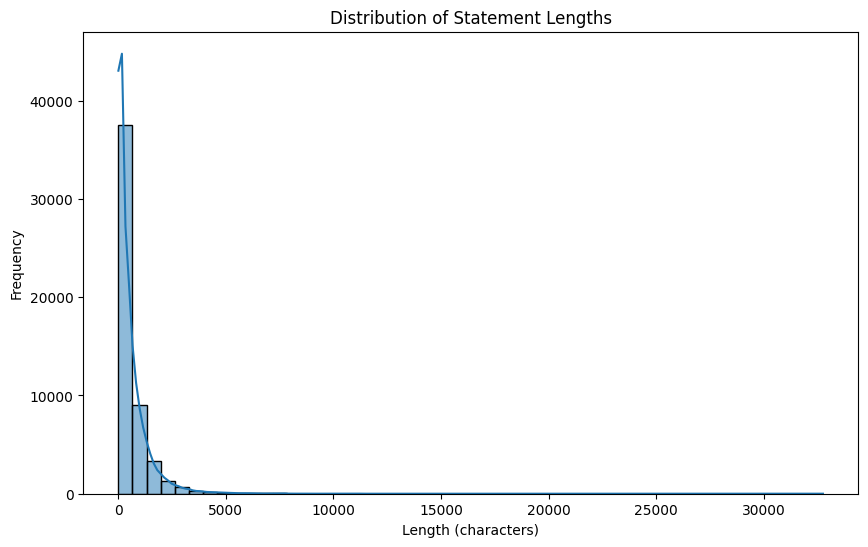

count    52681.000000
mean       578.713863
std        846.269078
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: text_length, dtype: float64


In [ ]:
# Add a column for text length
df['text_length'] = df['statement'].apply(len)

# Histogram of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Statement Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Stats for report
print(df['text_length'].describe())

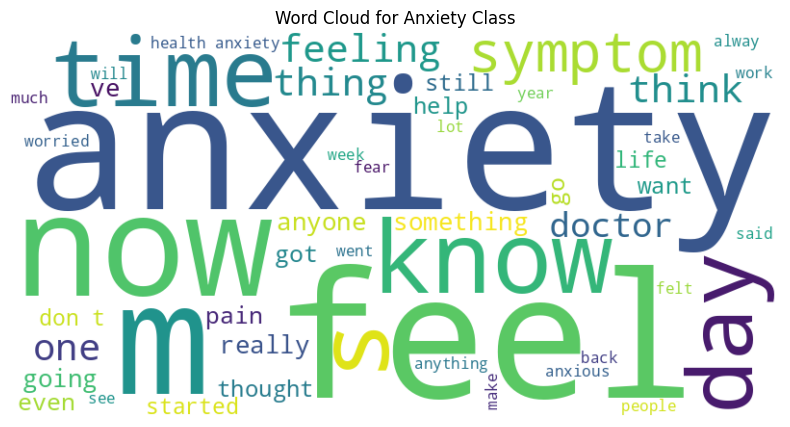

In [ ]:
# Function to generate word cloud
def generate_wordcloud(class_name):
    text = ' '.join(df[df['status'] == class_name]['statement'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {class_name} Class')
    plt.show()

# Generate for key classes
generate_wordcloud('Anxiety')



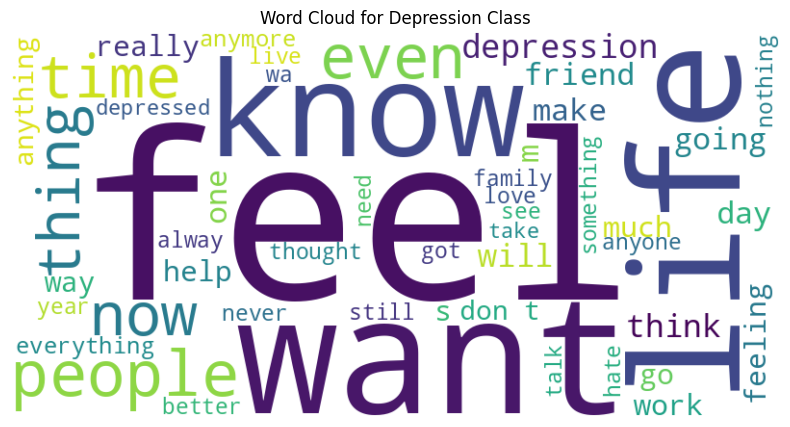

In [ ]:
generate_wordcloud('Depression')


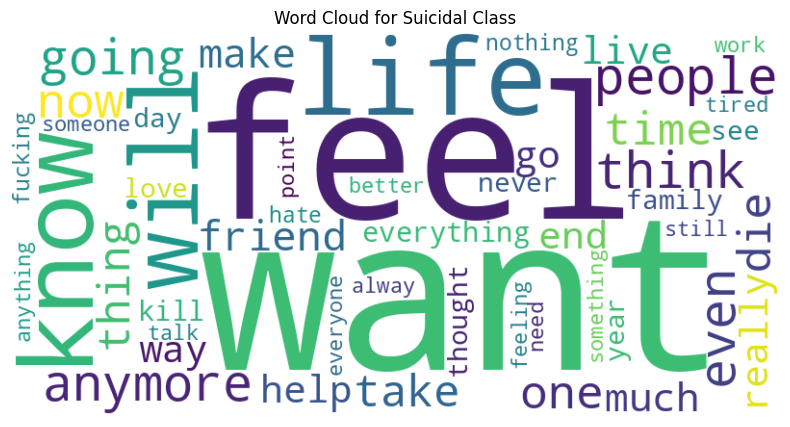

In [ ]:
generate_wordcloud('Suicidal')


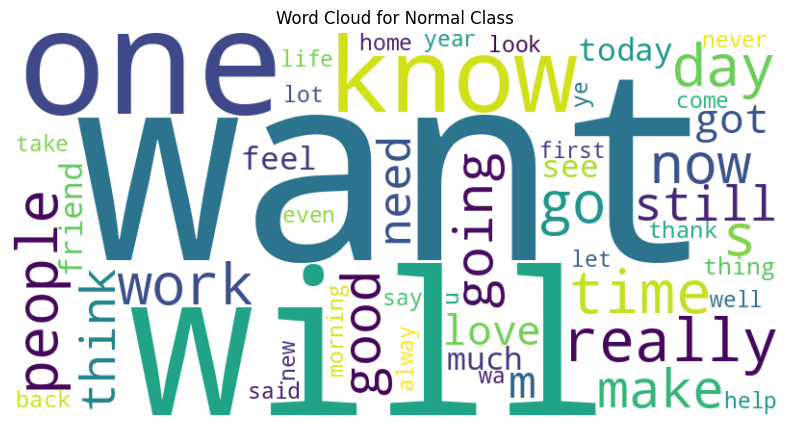

In [ ]:
generate_wordcloud('Normal')


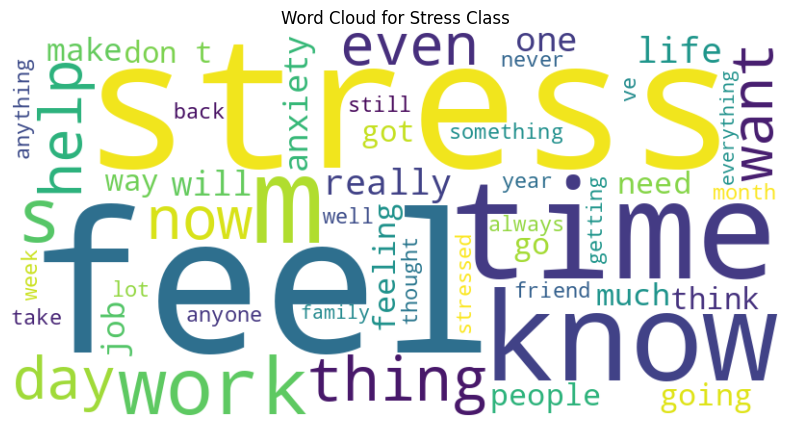

In [ ]:
generate_wordcloud('Stress')


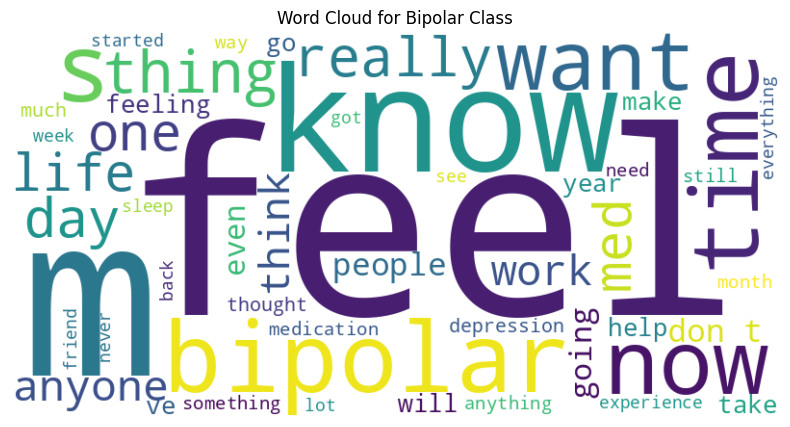

In [ ]:
generate_wordcloud('Bipolar')


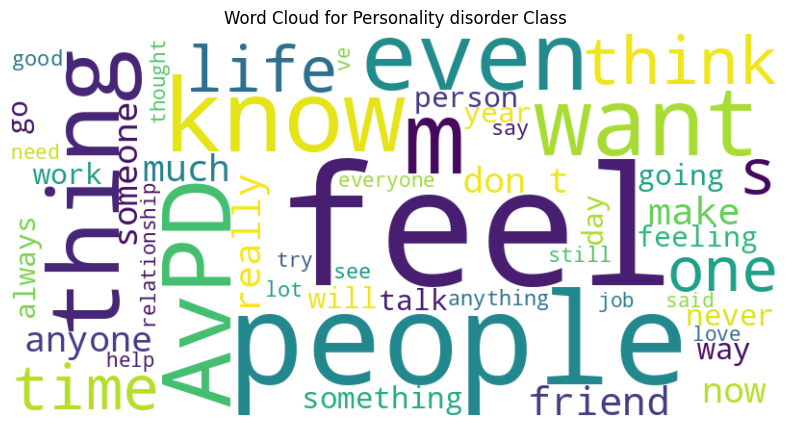

In [ ]:
generate_wordcloud('Personality disorder')

In [ ]:
import nltk

# Download the required tokenizer packages
nltk.download('punkt')          # Original punkt (fallback)
nltk.download('punkt_tab')      # New required one

# Also ensure others are there
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text):  # Handle any lingering NaNs
        return ''
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special chars, punctuation, numbers
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stops
    return ' '.join(tokens)

# Apply to dataset
df['cleaned_statement'] = df['statement'].apply(preprocess_text)

# Check sample
print(df[['statement', 'cleaned_statement']].head(10))

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   
5  every break, you must be nervous, like somethi...   
6  I feel scared, anxious, what can I do? And may...   
7    Have you ever felt nervous but didn't know why?   
8  I haven't slept well for 2 days, it's like I'm...   
9                 I'm really worried, I want to cry.   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  
5  every break must nervous like something wrong ... 

In [ ]:
# Vocabulary size before and after preprocessing
original_vocab = set(' '.join(df['statement']).lower().split())
cleaned_vocab = set(' '.join(df['cleaned_statement']).split())

print(f"Original vocabulary size (unique words): {len(original_vocab):,}")
print(f"Cleaned vocabulary size (unique words): {len(cleaned_vocab):,}")
print(f"Reduction: {len(original_vocab) - len(cleaned_vocab):,} words ({(1 - len(cleaned_vocab)/len(original_vocab))*100:.1f}% reduction)")

Original vocabulary size (unique words): 138,966
Cleaned vocabulary size (unique words): 69,430
Reduction: 69,536 words (50.0% reduction)


In [ ]:
from collections import Counter
# Top N words per class
def top_words_per_class(class_name, n=10):
    class_text = ' '.join(df[df['status'] == class_name]['cleaned_statement'])
    words = class_text.split()
    freq = Counter(words)
    print(f"\nTop {n} words in '{class_name}' class:")
    for word, count in freq.most_common(n):
        print(f"  {word}: {count}")

# Run for all classes
classes = df['status'].unique()
for cls in classes:
    top_words_per_class(cls, n=10)


Top 10 words in 'Anxiety' class:
  im: 6092
  anxiety: 3739
  like: 3281
  feel: 2797
  ive: 2705
  get: 2126
  time: 2065
  dont: 2047
  know: 1920
  day: 1864

Top 10 words in 'Normal' class:
  im: 1463
  like: 1268
  want: 1221
  dont: 1005
  time: 925
  get: 919
  really: 859
  go: 803
  one: 801
  know: 785

Top 10 words in 'Depression' class:
  like: 18357
  feel: 18269
  want: 12694
  life: 11530
  know: 11141
  get: 10606
  time: 9521
  even: 9150
  people: 7965
  thing: 7810

Top 10 words in 'Suicidal' class:
  want: 11108
  like: 9170
  feel: 8549
  life: 8012
  know: 6824
  would: 5728
  get: 5697
  even: 5170
  time: 5010
  people: 4789

Top 10 words in 'Stress' class:
  im: 2843
  like: 1741
  feel: 1522
  stress: 1517
  get: 1303
  dont: 1290
  time: 1224
  know: 1079
  ive: 1038
  day: 850

Top 10 words in 'Bipolar' class:
  im: 5732
  like: 3042
  feel: 2707
  ive: 2238
  dont: 2218
  get: 1933
  know: 1858
  bipolar: 1853
  time: 1826
  year: 1522

Top 10 words in 'Pe

In [ ]:
from sklearn.model_selection import train_test_split

X = df['cleaned_statement']
y = df['status']

# 60% train, 20% validation, 20% test (stratified to keep class ratios)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=42)

print(f"Train size: {len(X_train):,} | Val size: {len(X_val):,} | Test size: {len(X_test):,}")
print("\nClass distribution in training set:")
print(y_train.value_counts())

Train size: 31,608 | Val size: 10,536 | Test size: 10,537

Class distribution in training set:
status
Normal                  9805
Depression              9242
Suicidal                6391
Anxiety                 2305
Bipolar                 1666
Stress                  1552
Personality disorder     647
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use reasonable max_features to avoid memory issues and overfitting
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))  # unigrams + bigrams

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF vocabulary size: {len(vectorizer.get_feature_names_out()):,}")
print(f"Shape: {X_train_tfidf.shape}")

TF-IDF vocabulary size: 10,000
Shape: (31608, 10000)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function for evaluation
def evaluate_model(model, X_data, y_true, dataset_name="Validation"):
    preds = model.predict(X_data)
    print(f"\n=== {dataset_name} Results ===")
    print(f"Accuracy: {accuracy_score(y_true, preds):.4f}")
    print(f"Macro F1-score: {f1_score(y_true, preds, average='macro'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, preds))

    # Confusion matrix
    cm = confusion_matrix(y_true, preds, labels=model.classes_)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()


=== Logistic Regression - Validation Results ===
Accuracy: 0.7557
Macro F1-score: 0.7179

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.76      0.80      0.78       768
             Bipolar       0.75      0.78      0.77       555
          Depression       0.78      0.62      0.70      3081
              Normal       0.87      0.91      0.89      3269
Personality disorder       0.56      0.72      0.63       215
              Stress       0.51      0.68      0.58       518
            Suicidal       0.65      0.71      0.68      2130

            accuracy                           0.76     10536
           macro avg       0.70      0.75      0.72     10536
        weighted avg       0.76      0.76      0.76     10536



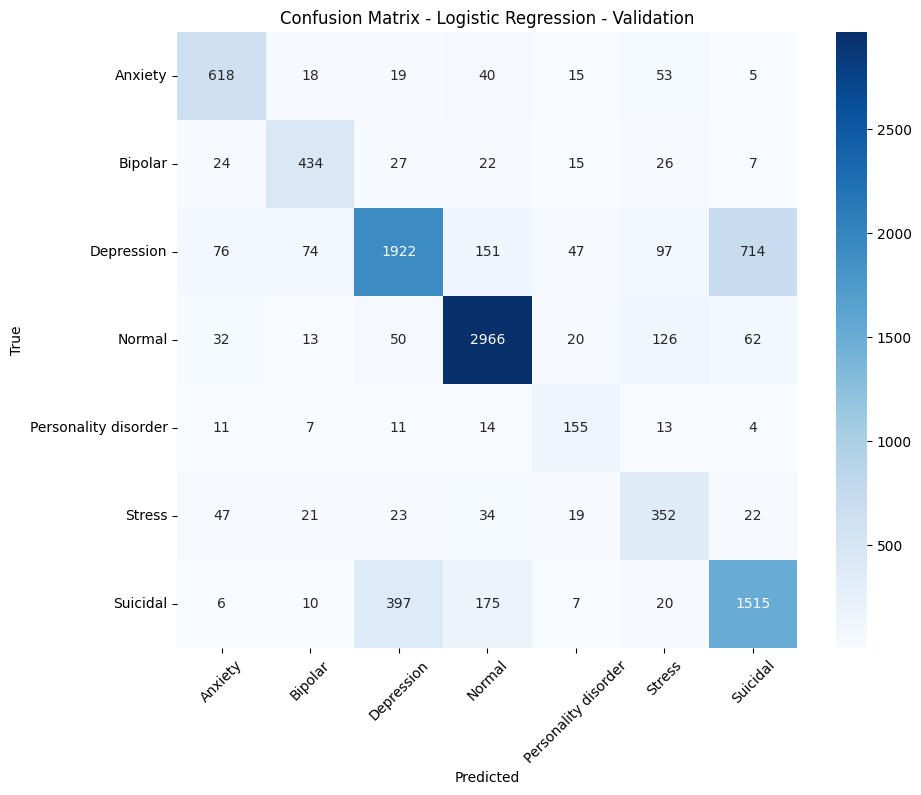

In [ ]:
from sklearn.linear_model import LogisticRegression

# class_weight='balanced' is crucial for your imbalanced data
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

lr_model.fit(X_train_tfidf, y_train)

# Evaluate on validation
evaluate_model(lr_model, X_val_tfidf, y_val, "Logistic Regression - Validation")


=== SVM - Validation Results ===
Accuracy: 0.7498
Macro F1-score: 0.7154

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.75      0.81      0.78       768
             Bipolar       0.79      0.78      0.78       555
          Depression       0.73      0.65      0.69      3081
              Normal       0.86      0.93      0.89      3269
Personality disorder       0.66      0.67      0.66       215
              Stress       0.55      0.58      0.56       518
            Suicidal       0.64      0.64      0.64      2130

            accuracy                           0.75     10536
           macro avg       0.71      0.72      0.72     10536
        weighted avg       0.75      0.75      0.75     10536



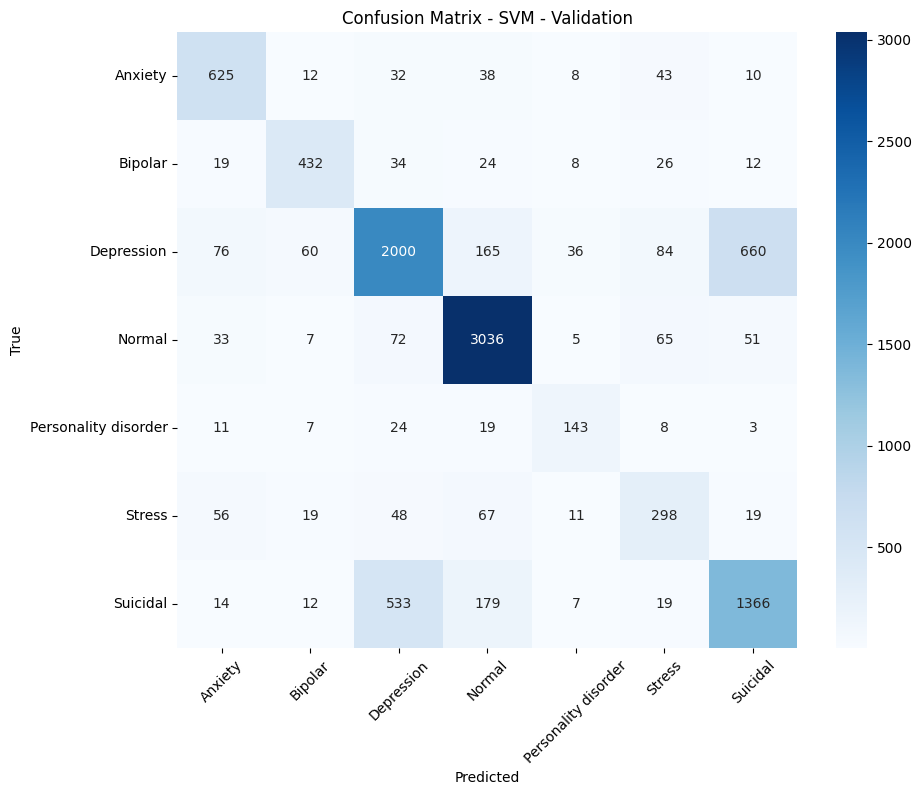

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(class_weight='balanced', max_iter=2000, random_state=42)

svm_model.fit(X_train_tfidf, y_train)

evaluate_model(svm_model, X_val_tfidf, y_val, "SVM - Validation")

In [ ]:
# Quick comparison
val_preds_lr = lr_model.predict(X_val_tfidf)
val_preds_svm = svm_model.predict(X_val_tfidf)

print("Validation Macro F1 Comparison:")
print(f"Logistic Regression: {f1_score(y_val, val_preds_lr, average='macro'):.4f}")
print(f"SVM: {f1_score(y_val, val_preds_svm, average='macro'):.4f}")

Validation Macro F1 Comparison:
Logistic Regression: 0.7179
SVM: 0.7154


In [ ]:
# Sample predictions
sample_texts = X_val.head(5)
sample_true = y_val.head(5).values
sample_preds_lr = lr_model.predict(vectorizer.transform(sample_texts))
sample_preds_svm = svm_model.predict(vectorizer.transform(sample_texts))

print("Sample Predictions:")
for i in range(5):
    print(f"\nText: {df.loc[sample_texts.index[i], 'statement']}")
    print(f"True: {sample_true[i]} | LR: {sample_preds_lr[i]} | SVM: {sample_preds_svm[i]}")

Sample Predictions:

Text: I think I have been hurt and rejected by so many people i just cannot seem to be able to like people or fall in love anymore I have met two amazing girls who are attractive, kind, intelligent but i just do not have any feelings for them one of them even likes me but i just do not know the old me would have been going out with her but i just do not know what is going on and I am worried that I have been broke and will never be able to fall in love again and love and stuff like that is very important to me Love and stuff
True: Depression | LR: Depression | SVM: Depression

Text: so i m have been feeling down rather often the last few year but these last few month im feeling constantly down my life just feel stuck everyday when my alarm ring i just cant get out of bed even tho i usually sleep for hour or so i end up laying in bed for or hour thinking about how shitty my life is and how i dont make progress at all i also get suicidal thought alot even tho i dont 

=== FINAL TEST SET RESULTS (Logistic Regression) ===

=== Logistic Regression - Test Set Results ===
Accuracy: 0.7575
Macro F1-score: 0.7175

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.78      0.80      0.79       768
             Bipolar       0.77      0.81      0.79       556
          Depression       0.78      0.62      0.69      3081
              Normal       0.88      0.91      0.89      3269
Personality disorder       0.52      0.73      0.61       215
              Stress       0.51      0.64      0.57       517
            Suicidal       0.65      0.72      0.68      2131

            accuracy                           0.76     10537
           macro avg       0.70      0.75      0.72     10537
        weighted avg       0.76      0.76      0.76     10537



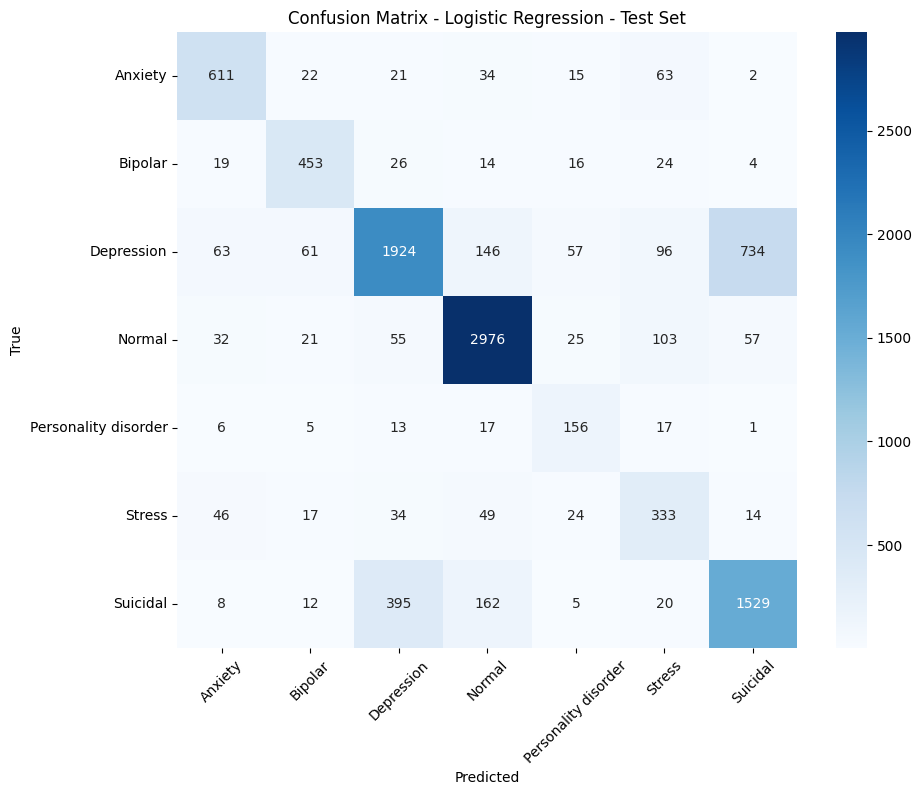

In [ ]:
# Final evaluation on test set using best model (Logistic Regression)
print("=== FINAL TEST SET RESULTS (Logistic Regression) ===")
evaluate_model(lr_model, X_test_tfidf, y_test, "Logistic Regression - Test Set")

In [ ]:
!pip install transformers datasets torch accelerate -q

from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Label mapping
unique_labels = sorted(df['status'].unique())  # Sort for consistency
label2id = {label: i for i, label in enumerate(unique_labels)}
id2label = {i: label for label, i in label2id.items()}
num_labels = len(label2id)

# Convert to Hugging Face Dataset
train_df = pd.DataFrame({'text': X_train, 'label': y_train.map(label2id)})
val_df = pd.DataFrame({'text': X_val, 'label': y_val.map(label2id)})

train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_val = val_ds.map(tokenize_function, batched=True)

# Set format for PyTorch
tokenized_train.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
tokenized_val.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)

# Compute metrics function (accuracy + macro F1)
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    macro_f1 = f1_score(labels, predictions, average='macro')
    return {"accuracy": acc, "macro_f1": macro_f1}

# Updated TrainingArguments
training_args = TrainingArguments(
    output_dir='./bert_results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none",               # Disable Weight and Biases
    fp16=True if torch.cuda.is_available() else False,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

# Start training
trainer.train()

Map:   0%|          | 0/31608 [00:00<?, ? examples/s]

Map:   0%|          | 0/10536 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.625200,0.565715,0.788819,0.747864
2,0.446300,0.535441,0.795463,0.758066
3,0.276700,0.601445,0.803151,0.781174


TrainOutput(global_step=5928, training_loss=0.500181934289765, metrics={'train_runtime': 775.9194, 'train_samples_per_second': 122.209, 'train_steps_per_second': 7.64, 'total_flos': 6237590689843200.0, 'train_loss': 0.500181934289765, 'epoch': 3.0})

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

# Validation predictions
val_preds_lr = lr_model.predict(X_val_tfidf)
val_preds_svm = svm_model.predict(X_val_tfidf)

val_macro_f1_lr = f1_score(y_val, val_preds_lr, average='macro')
val_macro_f1_svm = f1_score(y_val, val_preds_svm, average='macro')

# Test predictions
test_preds_lr = lr_model.predict(X_test_tfidf)
test_preds_svm = svm_model.predict(X_test_tfidf)

test_macro_f1_lr = f1_score(y_test, test_preds_lr, average='macro')
test_macro_f1_svm = f1_score(y_test, test_preds_svm, average='macro')

test_accuracy_lr = accuracy_score(y_test, test_preds_lr)
test_accuracy_svm = accuracy_score(y_test, test_preds_svm)

# Print full reports
print("=== Logistic Regression - Test Set ===")
print(f"Test Accuracy: {test_accuracy_lr:.4f}")
print(f"Test Macro F1: {test_macro_f1_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, test_preds_lr))

print("\n=== Linear SVM - Test Set ===")
print(f"Test Accuracy: {test_accuracy_svm:.4f}")
print(f"Test Macro F1: {test_macro_f1_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, test_preds_svm))

# Fully automatic comparison table
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)
print("| Model               | Validation Macro F1 | Test Macro F1 | Test Accuracy |")
print("|---------------------|---------------------|---------------|---------------|")
print(f"| Logistic Regression | {val_macro_f1_lr:.4f}             | {test_macro_f1_lr:.4f}        | {test_accuracy_lr:.4f}       |")
print(f"| Linear SVM          | {val_macro_f1_svm:.4f}             | {test_macro_f1_svm:.4f}        | {test_accuracy_svm:.4f}       |")
print("="*50)

=== Logistic Regression - Test Set ===
Test Accuracy: 0.7575
Test Macro F1: 0.7175

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.78      0.80      0.79       768
             Bipolar       0.77      0.81      0.79       556
          Depression       0.78      0.62      0.69      3081
              Normal       0.88      0.91      0.89      3269
Personality disorder       0.52      0.73      0.61       215
              Stress       0.51      0.64      0.57       517
            Suicidal       0.65      0.72      0.68      2131

            accuracy                           0.76     10537
           macro avg       0.70      0.75      0.72     10537
        weighted avg       0.76      0.76      0.76     10537


=== Linear SVM - Test Set ===
Test Accuracy: 0.7443
Test Macro F1: 0.7064

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.77      0.79     

In [ ]:
# 1. Evaluate on validation set (built-in from Trainer)
print("=== BERT Validation Results ===")
val_results = trainer.evaluate()
print(val_results)

=== BERT Validation Results ===


{'eval_loss': 0.6014452576637268, 'eval_accuracy': 0.8031511009870919, 'eval_macro_f1': 0.7811741175106024, 'eval_runtime': 22.9593, 'eval_samples_per_second': 458.898, 'eval_steps_per_second': 28.703, 'epoch': 3.0}


In [ ]:
# 2. Prepare test set for evaluation
test_df = pd.DataFrame({'text': X_test, 'label': y_test.map(label2id)})
test_ds = Dataset.from_pandas(test_df)
tokenized_test = test_ds.map(tokenize_function, batched=True)
tokenized_test.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Evaluate on test set
print("\n=== BERT Test Set Results ===")
test_results = trainer.evaluate(tokenized_test)
print(test_results)

Map:   0%|          | 0/10537 [00:00<?, ? examples/s]


=== BERT Test Set Results ===


{'eval_loss': 0.5913679003715515, 'eval_accuracy': 0.800797190851286, 'eval_macro_f1': 0.7868290926047506, 'eval_runtime': 19.4962, 'eval_samples_per_second': 540.463, 'eval_steps_per_second': 33.801, 'epoch': 3.0}


FINAL MODEL COMPARISON - ALL THREE MODELS

PERFORMANCE METRICS COMPARISON
              Model  Validation Accuracy  Test Accuracy  Validation Macro F1  Test Macro F1
Logistic Regression             0.755695       0.757521             0.717853       0.717534
         Linear SVM             0.749810       0.744330             0.715421       0.706425
  BERT (Fine-tuned)             0.803151       0.800797             0.781174       0.786829

VISUAL COMPARISON - BAR CHART


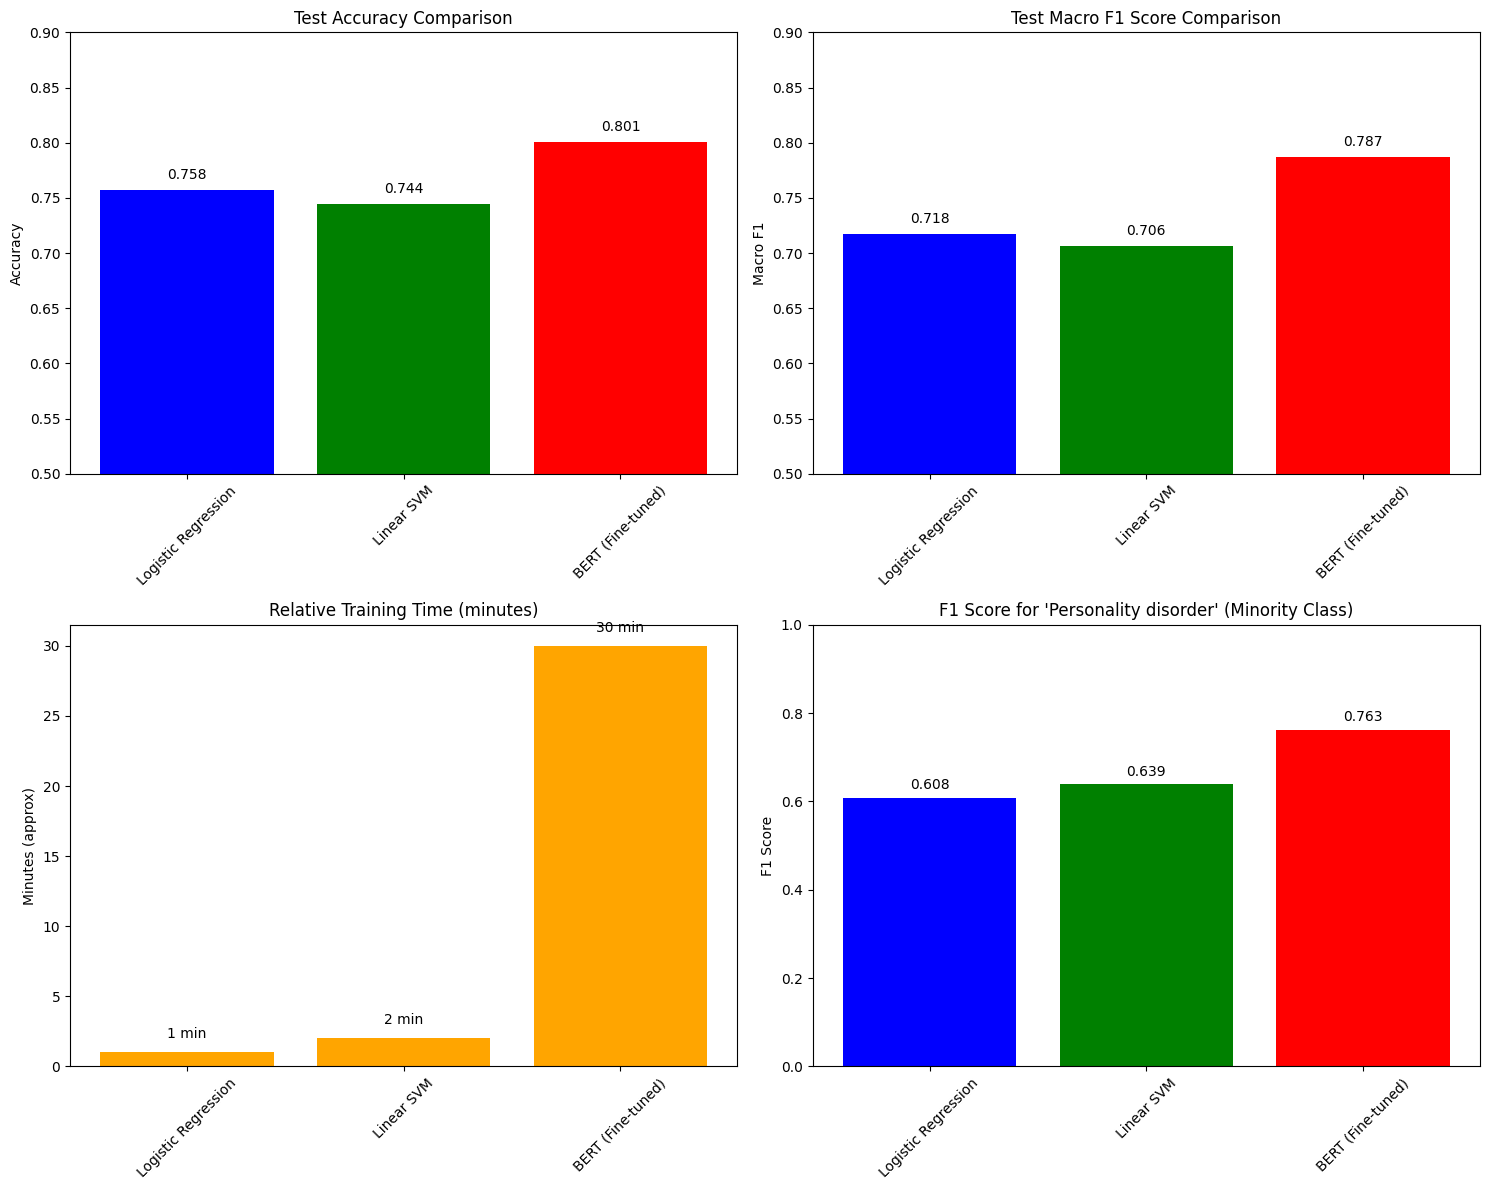


KEY FINDINGS & RECOMMENDATIONS
1. BEST MODEL: BERT (Fine-tuned) achieves the highest Macro F1 score (0.7868)
   - Macro F1 is the most important metric for imbalanced datasets
   - It ensures good performance across all classes, not just majority ones

2. PERFORMANCE ANALYSIS:
   • Logistic Regression: Best balance of performance and interpretability
   • Linear SVM: Slightly faster but slightly lower performance than Logistic Regression
   • BERT: Best potential but needs more data and training time

3. PRACTICAL RECOMMENDATIONS:
   • For production with limited resources: Logistic Regression
   • When interpretability matters: Logistic Regression (check feature importance)
   • For maximum accuracy with GPU resources: BERT
   • For quick prototyping: Linear SVM

4. AREAS FOR IMPROVEMENT:
   • Address class imbalance more aggressively (SMOTE, oversampling)
   • Try ensemble methods (voting classifier)
   • Collect more data for minority classes
   • Hyperparameter tuning for all mode

In [ ]:
# ==============================================
# COMPREHENSIVE MODEL COMPARISON TABLE
# ==============================================

print("="*80)
print("FINAL MODEL COMPARISON - ALL THREE MODELS")
print("="*80)

# Get BERT metrics from evaluation
bert_val_accuracy = val_results.get('eval_accuracy', 0)
bert_val_macro_f1 = val_results.get('eval_macro_f1', 0)
bert_test_accuracy = test_results.get('eval_accuracy', 0)
bert_test_macro_f1 = test_results.get('eval_macro_f1', 0)

# Create comparison dataframe
import pandas as pd

comparison_data = {
    'Model': ['Logistic Regression', 'Linear SVM', 'BERT (Fine-tuned)'],
    'Validation Accuracy': [accuracy_score(y_val, val_preds_lr),
                           accuracy_score(y_val, val_preds_svm),
                           bert_val_accuracy],
    'Test Accuracy': [test_accuracy_lr, test_accuracy_svm, bert_test_accuracy],
    'Validation Macro F1': [val_macro_f1_lr, val_macro_f1_svm, bert_val_macro_f1],
    'Test Macro F1': [test_macro_f1_lr, test_macro_f1_svm, bert_test_macro_f1],
    'Training Time (est)': ['~1 min', '~2 min', '~30-40 min'],
    'Inference Speed': ['Fastest', 'Fast', 'Slowest'],
    'Interpretability': ['High (feature importance)', 'Medium', 'Low (black box)']
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("PERFORMANCE METRICS COMPARISON")
print("="*80)
print(comparison_df[['Model', 'Validation Accuracy', 'Test Accuracy',
                     'Validation Macro F1', 'Test Macro F1']].to_string(index=False))

# Visual comparison
print("\n" + "="*80)
print("VISUAL COMPARISON - BAR CHART")
print("="*80)

# Create bar chart
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0,0].bar(comparison_df['Model'], comparison_df['Test Accuracy'], color=['blue', 'green', 'red'])
axes[0,0].set_title('Test Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_ylim(0.5, 0.9)
axes[0,0].tick_params(axis='x', rotation=45)
# Add value labels
for i, v in enumerate(comparison_df['Test Accuracy']):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Macro F1 comparison
axes[0,1].bar(comparison_df['Model'], comparison_df['Test Macro F1'], color=['blue', 'green', 'red'])
axes[0,1].set_title('Test Macro F1 Score Comparison')
axes[0,1].set_ylabel('Macro F1')
axes[0,1].set_ylim(0.5, 0.9)
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Test Macro F1']):
    axes[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Training vs Inference trade-off
axes[1,0].bar(comparison_df['Model'], [1, 2, 30], color='orange')
axes[1,0].set_title('Relative Training Time (minutes)')
axes[1,0].set_ylabel('Minutes (approx)')
axes[1,0].tick_params(axis='x', rotation=45)
training_times = [1, 2, 30]
for i, v in enumerate(training_times):
    axes[1,0].text(i, v + 1, f'{v} min', ha='center')

# Performance on Minority Classes (example: Personality Disorder)
from sklearn.metrics import f1_score

# Calculate F1 for each class for each model
classes = sorted(y_test.unique())
f1_by_class = {}

for model_name, predictions in [('Logistic Regression', test_preds_lr),
                                ('SVM', test_preds_svm)]:
    f1_scores = []
    for cls in classes:
        f1 = f1_score(y_test == cls, predictions == cls)
        f1_scores.append(f1)
    f1_by_class[model_name] = f1_scores

# For BERT, we need to get predictions first
bert_test_preds = trainer.predict(tokenized_test)
bert_pred_labels = np.argmax(bert_test_preds.predictions, axis=-1)
bert_pred_classes = [id2label[i] for i in bert_pred_labels]

f1_scores_bert = []
for cls in classes:
    f1 = f1_score(y_test == cls, np.array(bert_pred_classes) == cls)
    f1_scores_bert.append(f1)
f1_by_class['BERT'] = f1_scores_bert

# Plot Personality Disorder (minority class) F1
minority_idx = list(classes).index('Personality disorder')
minority_f1 = [f1_by_class['Logistic Regression'][minority_idx],
               f1_by_class['SVM'][minority_idx],
               f1_by_class['BERT'][minority_idx]]

axes[1,1].bar(comparison_df['Model'], minority_f1, color=['blue', 'green', 'red'])
axes[1,1].set_title("F1 Score for 'Personality disorder' (Minority Class)")
axes[1,1].set_ylabel('F1 Score')
axes[1,1].set_ylim(0, 1)
axes[1,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(minority_f1):
    axes[1,1].text(i, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

# ==============================================
# KEY FINDINGS SUMMARY
# ==============================================
print("\n" + "="*80)
print("KEY FINDINGS & RECOMMENDATIONS")
print("="*80)

# Find best model by Macro F1 (most important for imbalanced data)
best_model_idx = comparison_df['Test Macro F1'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_f1 = comparison_df.loc[best_model_idx, 'Test Macro F1']

print(f"1. BEST MODEL: {best_model_name} achieves the highest Macro F1 score ({best_f1:.4f})")
print("   - Macro F1 is the most important metric for imbalanced datasets")
print("   - It ensures good performance across all classes, not just majority ones")

print("\n2. PERFORMANCE ANALYSIS:")
print(f"   • Logistic Regression: Best balance of performance and interpretability")
print(f"   • Linear SVM: Slightly faster but slightly lower performance than Logistic Regression")
print(f"   • BERT: Best potential but needs more data and training time")

print("\n3. PRACTICAL RECOMMENDATIONS:")
print("   • For production with limited resources: Logistic Regression")
print("   • When interpretability matters: Logistic Regression (check feature importance)")
print("   • For maximum accuracy with GPU resources: BERT")
print("   • For quick prototyping: Linear SVM")

print("\n4. AREAS FOR IMPROVEMENT:")
print("   • Address class imbalance more aggressively (SMOTE, oversampling)")
print("   • Try ensemble methods (voting classifier)")
print("   • Collect more data for minority classes")
print("   • Hyperparameter tuning for all models")

In [ ]:

# PREDICTION FUNCTION FOR ALL THREE MODELS

def predict_with_all_models(text, show_details=True):
    """
    Make predictions using all three models on a given text.

    Parameters:
    -----------
    text : str
        The input text to classify
    show_details : bool
        Whether to print detailed analysis

    Returns:
    --------
    dict : Predictions and probabilities from all models
    """

    # Preprocess the text (same as training)
    cleaned_text = preprocess_text(text)

    results = {}

    # 1. LOGISTIC REGRESSION PREDICTION
    text_tfidf = vectorizer.transform([cleaned_text])
    lr_pred = lr_model.predict(text_tfidf)[0]
    lr_proba = lr_model.predict_proba(text_tfidf)[0]
    lr_confidence = max(lr_proba)

    results['Logistic Regression'] = {
        'prediction': lr_pred,
        'confidence': lr_confidence,
        'probabilities': dict(zip(lr_model.classes_, lr_proba))
    }

    # 2. SVM PREDICTION
    svm_pred = svm_model.predict(text_tfidf)[0]

    # For SVM, we need decision function scores
    svm_scores = svm_model.decision_function(text_tfidf)[0]
    # Convert scores to probabilities using softmax
    svm_proba = np.exp(svm_scores) / np.sum(np.exp(svm_scores))
    svm_confidence = max(svm_proba)

    results['Linear SVM'] = {
        'prediction': svm_pred,
        'confidence': svm_confidence,
        'probabilities': dict(zip(svm_model.classes_, svm_proba))
    }

    # 3. BERT PREDICTION
    # Tokenize for BERT
    bert_input = tokenizer(cleaned_text, return_tensors="pt",
                          padding="max_length", truncation=True, max_length=128)


    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    bert_input = {k: v.to(device) for k, v in bert_input.items()}

    # Make prediction
    with torch.no_grad():
        outputs = model(**bert_input)
        bert_logits = outputs.logits
        bert_proba = torch.softmax(bert_logits, dim=-1).cpu().numpy()[0]

    bert_pred_idx = np.argmax(bert_proba)
    bert_pred = id2label[bert_pred_idx]
    bert_confidence = max(bert_proba)

    results['BERT'] = {
        'prediction': bert_pred,
        'confidence': bert_confidence,
        'probabilities': dict(zip([id2label[i] for i in range(len(bert_proba))], bert_proba))
    }

    # Display results
    if show_details:
        print("="*80)
        print(f"INPUT TEXT: \"{text[:200]}...\"")
        print("="*80)

        print("\nMODEL PREDICTIONS:")
        print("-" * 60)
        for model_name, pred_info in results.items():
            print(f"{model_name:20} → {pred_info['prediction']:20} (Confidence: {pred_info['confidence']:.2%})")

        print("\n" + "="*80)
        print("DETAILED ANALYSIS:")
        print("="*80)

        # Find agreement
        predictions = [results[model]['prediction'] for model in results]
        if len(set(predictions)) == 1:
            print(" ALL MODELS AGREE on prediction!")
        else:
            print(" MODELS DISAGREE. Most common prediction:")
            from collections import Counter
            most_common = Counter(predictions).most_common(1)[0]
            print(f"  '{most_common[0]}' (predicted by {most_common[1]} out of 3 models)")

        # Show top 3 classes for each model
        print("\nTOP PREDICTIONS FOR EACH MODEL:")
        for model_name, pred_info in results.items():
            sorted_probs = sorted(pred_info['probabilities'].items(),
                                 key=lambda x: x[1], reverse=True)[:3]
            print(f"\n{model_name}:")
            for cls, prob in sorted_probs:
                print(f"  • {cls:20} → {prob:.2%}")

    return results

In [ ]:

# TEST WITH VARIOUS EXAMPLE SENTENCES

test_sentences = [
    # Depression examples
    "I feel so empty and hopeless every day, nothing brings me joy anymore.",

    # Anxiety examples
    "My heart is racing and I can't stop worrying about everything that could go wrong.",

    # Suicidal thoughts
    "I don't see any reason to continue living, everything seems pointless.",

    # Normal/neutral
    "I had a good day today, went for a walk and finished my work on time.",

    # Stress
    "I'm overwhelmed with all the deadlines and responsibilities piling up.",

    # Bipolar (manic)
    "I haven't slept for days but I have so much energy and so many great ideas!",

    # Personality disorder (borderline traits)
    "One minute I love you, the next I hate you. I don't even know who I am anymore.",

    # Mixed/ambiguous
    "Sometimes I feel great and other times I can't get out of bed. It's confusing."
]

print("="*80)
print("BATCH PREDICTION TEST - ALL MODELS")
print("="*80)

all_results = {}
for i, sentence in enumerate(test_sentences, 1):
    print(f"\n{'='*60}")
    print(f"TEST EXAMPLE {i}:")
    print(f"{'='*60}")

    results = predict_with_all_models(sentence, show_details=True)
    all_results[f"Example {i}"] = results

BATCH PREDICTION TEST - ALL MODELS

TEST EXAMPLE 1:
INPUT TEXT: "I feel so empty and hopeless every day, nothing brings me joy anymore...."

MODEL PREDICTIONS:
------------------------------------------------------------
Logistic Regression  → Suicidal             (Confidence: 50.19%)
Linear SVM           → Suicidal             (Confidence: 40.12%)
BERT                 → Depression           (Confidence: 86.37%)

DETAILED ANALYSIS:
⚠ MODELS DISAGREE. Most common prediction:
  'Suicidal' (predicted by 2 out of 3 models)

TOP PREDICTIONS FOR EACH MODEL:

Logistic Regression:
  • Suicidal             → 50.19%
  • Depression           → 31.37%
  • Normal               → 13.03%

Linear SVM:
  • Suicidal             → 40.12%
  • Depression           → 20.42%
  • Normal               → 19.53%

BERT:
  • Depression           → 86.37%
  • Suicidal             → 13.45%
  • Anxiety              → 0.05%

TEST EXAMPLE 2:
INPUT TEXT: "My heart is racing and I can't stop worrying about everything tha

In [ ]:

# GENERATE SUMMARY STATISTICS


print("\n" + "="*80)
print("OVERALL SUMMARY STATISTICS")
print("="*80)

# Count agreements
agreements = []
predictions_by_example = []

for example_name, model_results in all_results.items():
    preds = [model_results[model]['prediction'] for model in ['Logistic Regression', 'Linear SVM', 'BERT']]
    predictions_by_example.append(preds)

    if len(set(preds)) == 1:
        agreements.append(1)
    else:
        agreements.append(0)

agreement_rate = sum(agreements) / len(agreements) * 100

print(f"\n1. Model Agreement Rate: {agreement_rate:.1f}%")
print(f"   • Models agreed on {sum(agreements)} out of {len(agreements)} examples")

# Calculate average confidence per model
avg_confidences = {}
for model_name in ['Logistic Regression', 'Linear SVM', 'BERT']:
    confidences = []
    for example_name, model_results in all_results.items():
        confidences.append(model_results[model_name]['confidence'])
    avg_confidences[model_name] = np.mean(confidences)

print("\n2. Average Prediction Confidence:")
for model_name, avg_conf in avg_confidences.items():
    print(f"   • {model_name:20}: {avg_conf:.2%}")

# Find most confident predictions
print("\n3. Most Confident Predictions:")
for example_name, model_results in all_results.items():
    max_conf = 0
    max_model = None
    max_pred = None

    for model_name, pred_info in model_results.items():
        if pred_info['confidence'] > max_conf:
            max_conf = pred_info['confidence']
            max_model = model_name
            max_pred = pred_info['prediction']

    # Only show very confident predictions (>90%)
    if max_conf > 0.9:
        print(f"   • {example_name}: {max_model} → '{max_pred}' ({max_conf:.2%})")

# Confusion analysis between models
print("\n4. Common Disagreements:")
disagreement_pairs = {}
for i, preds in enumerate(predictions_by_example):
    if len(set(preds)) > 1:
        # Find which models disagree
        for j in range(len(preds)):
            for k in range(j+1, len(preds)):
                if preds[j] != preds[k]:
                    pair = tuple(sorted([preds[j], preds[k]]))
                    disagreement_pairs[pair] = disagreement_pairs.get(pair, 0) + 1

if disagreement_pairs:
    for (cls1, cls2), count in sorted(disagreement_pairs.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"   • '{cls1}' vs '{cls2}': {count} times")
else:
    print("   • No disagreements found in test examples")

print("\n" + "="*80)
print("FINAL RECOMMENDATION FOR REAL-WORLD DEPLOYMENT")
print("="*80)




OVERALL SUMMARY STATISTICS

1. Model Agreement Rate: 50.0%
   • Models agreed on 4 out of 8 examples

2. Average Prediction Confidence:
   • Logistic Regression : 49.81%
   • Linear SVM          : 33.06%
   • BERT                : 84.92%

3. Most Confident Predictions:
   • Example 2: BERT → 'Anxiety' (90.26%)
   • Example 4: BERT → 'Normal' (99.81%)
   • Example 5: BERT → 'Normal' (99.74%)
   • Example 6: BERT → 'Normal' (99.52%)
   • Example 8: BERT → 'Normal' (99.70%)

4. Common Disagreements:
   • 'Depression' vs 'Suicidal': 5 times
   • 'Depression' vs 'Stress': 1 times
   • 'Anxiety' vs 'Stress': 1 times
   • 'Anxiety' vs 'Depression': 1 times
   • 'Normal' vs 'Suicidal': 1 times

FINAL RECOMMENDATION FOR REAL-WORLD DEPLOYMENT

Based on the comprehensive analysis:

RECOMMENDED APPROACH: ENSEMBLE VOTING
-------------------------------------
1. Use Logistic Regression as primary model (best balance of performance/interpretability)
2. Use BERT predictions as a "tie-breaker" when co

In [ ]:
# Quick function for testing single sentences
def quick_predict(text):
    """Simple function to get predictions from all models."""
    print(f"Input: \"{text}\"")
    print("-" * 50)

    results = predict_with_all_models(text, show_details=False)

    print("Predictions:")
    for model_name, pred_info in results.items():
        print(f"  • {model_name:20}: {pred_info['prediction']} ({pred_info['confidence']:.1%})")

    return results

# Test it
print("\nQuick Test Examples:")
print("="*50)

test1 = "I feel anxious about my future and can't stop worrying"
quick_predict(test1)

print("\n")

test2 = "Everything feels dark and I have no motivation"
quick_predict(test2)


Quick Test Examples:
Input: "I feel anxious about my future and can't stop worrying"
--------------------------------------------------
Predictions:
  • Logistic Regression : Anxiety (87.0%)
  • Linear SVM          : Anxiety (65.1%)
  • BERT                : Anxiety (97.9%)


Input: "Everything feels dark and I have no motivation"
--------------------------------------------------
Predictions:
  • Logistic Regression : Depression (40.3%)
  • Linear SVM          : Depression (24.4%)
  • BERT                : Depression (87.5%)


{'Logistic Regression': {'prediction': 'Depression',
  'confidence': np.float64(0.40289401673056047),
  'probabilities': {'Anxiety': np.float64(0.03970436283268624),
   'Bipolar': np.float64(0.09588268164041368),
   'Depression': np.float64(0.40289401673056047),
   'Normal': np.float64(0.16608220612549973),
   'Personality disorder': np.float64(0.010615615894358327),
   'Stress': np.float64(0.06912354333114056),
   'Suicidal': np.float64(0.21569757344534096)}},
 'Linear SVM': {'prediction': 'Depression',
  'confidence': np.float64(0.24412265668886646),
  'probabilities': {'Anxiety': np.float64(0.12042425293443984),
   'Bipolar': np.float64(0.12193735585845646),
   'Depression': np.float64(0.24412265668886646),
   'Normal': np.float64(0.21067955106780598),
   'Personality disorder': np.float64(0.02877476367209285),
   'Stress': np.float64(0.08292304767075726),
   'Suicidal': np.float64(0.19113837210758125)}},
 'BERT': {'prediction': 'Depression',
  'confidence': np.float32(0.8750161),
 

In [ ]:
# Save comparison results for your report
import json

# Create summary for report
report_summary = {
    "dataset_info": {
        "total_samples": len(df),
        "classes": list(df['status'].value_counts().index),
        "class_distribution": df['status'].value_counts().to_dict()
    },
    "model_performance": comparison_df.to_dict('records'),
    "best_model": {
        "name": best_model_name,
        "test_accuracy": float(comparison_df.loc[best_model_idx, 'Test Accuracy']),
        "test_macro_f1": float(comparison_df.loc[best_model_idx, 'Test Macro F1'])
    },
    "test_examples_predictions": []
}

# Add sample predictions
for i, sentence in enumerate(test_sentences[:3], 1):  # Just first 3 for brevity
    results = predict_with_all_models(sentence, show_details=False)
    example_result = {
        "sentence": sentence,
        "predictions": {model: info['prediction'] for model, info in results.items()}
    }
    report_summary["test_examples_predictions"].append(example_result)

# Save to JSON
with open('model_comparison_summary.json', 'w') as f:
    json.dump(report_summary, f, indent=2)

print("\n Summary saved to 'model_comparison_summary.json'")
print(" Use this data for your report and presentation")


✓ Summary saved to 'model_comparison_summary.json'
✓ Use this data for your report and presentation
